In [1]:
import numpy as np
import pandas as pd
wine = pd.read_csv('/Users/wlee/Desktop/Georgia Tech/Spring 2018/CS 4400 Intro to Databases/Project/wine-reviews/winemag-data-130k-v2.csv')
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [2]:
wine = wine[['country', 'description', 'title', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery']]
wine.head()

,country,description,title,designation,points,price,province,region_1,region_2,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Nicosia 2013 Vulkà Bianco (Etna),Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Quinta dos Avidagos 2011 Avidagos Red (Douro),Avidagos,87,15.0,Douro,NaN,NaN,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",Rainstorm 2013 Pinot Gris (Willamette Valley),NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",St. Julian 2013 Reserve Late Harvest Riesling ...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks


In [3]:
reviews = wine['description']
reviews.head()

0    Aromas include tropical fruit, broom, brimston...
1    This is ripe and fruity, a wine that is smooth...
2    Tart and snappy, the flavors of lime flesh and...
3    Pineapple rind, lemon pith and orange blossom ...
4    Much like the regular bottling from 2012, this...
Name: description, dtype: object

In [4]:
from collections import defaultdict
BoW = defaultdict(int)
for review in reviews:
    words = review.split()
    for word in words:
        if word[-1] in [',', '.', ':', ';']:
            word = word[:-1]
        BoW[word] += 1

sorted(BoW.items(), key=lambda k_v: k_v[1], reverse=True)

[('and', 347062),
 ('of', 172851),
 ('the', 168171),
 ('a', 157462),
 ('with', 115643),
 ('is', 96682),
 ('wine', 77788),
 ('this', 72869),
 ('flavors', 60201),
 ('in', 60087),
 ('to', 55301),
 ('The', 52631),
 ('fruit', 44774),
 ('on', 43085),
 ('This', 41122),
 ('palate', 38077),
 ('that', 35820),
 ('aromas', 35419),
 ('finish', 34934),
 ('acidity', 34520),
 ('it', 32188),
 ('tannins', 30497),
 ('from', 29954),
 ('but', 29388),
 ('cherry', 26982),
 ('are', 25833),
 ('ripe', 24930),
 ('has', 24544),
 ('black', 24408),
 ('It', 23444),
 ('A', 21858),
 ('for', 20728),
 ('by', 20593),
 ('Drink', 20405),
 ("It's", 20013),
 ('notes', 18552),
 ('spice', 18470),
 ('red', 17919),
 ('as', 17286),
 ('nose', 16896),
 ('its', 16360),
 ('oak', 16163),
 ('rich', 16050),
 ('an', 15735),
 ('fresh', 15415),
 ('berry', 15287),
 ('now', 14992),
 ('dry', 14033),
 ('plum', 13765),
 ('fruits', 13490),
 ('blend', 13014),
 ('offers', 12558),
 ('apple', 12500),
 ('texture', 12361),
 ('blackberry', 12205),
 ('s

In [5]:
bag = pd.DataFrame(columns = ['flavor', 'count'])
for k,v in BoW.items():
    bag = bag.append({'flavor': k, 'count': v}, ignore_index = True)
bag.head(10)

,flavor,count
0,Aromas,4189
1,include,671
2,tropical,3442
3,fruit,44774
4,broom,185
5,brimstone,66
6,and,347062
7,dried,7560
8,herb,6272
9,The,52631


In [6]:
sorted_bag = bag.copy()
sorted_bag = sorted_bag.sort_values(by = 'count', ascending = False)
non_important = ['he', 'of', 'to', 'and', 'a', 'in', 'is', 'it', 'you', 'that', 'he', 'was', 'for', 'on', 'are', 'with', 'as', 'I', 'his', 'they', 'be', 'at', 'one', 'have', 'this', 'the', 'wine', 'flavors', 'but', "it's", 'has', 'palate', 'finish', 'from', 'by', 'drink', 'notes', 'nose', 'its', 'an', 'now', 'offers']
top_15 = sorted_bag[~sorted_bag.flavor.str.lower().isin(non_important)].head(15)


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'count', y= 'flavor', data = top_15)

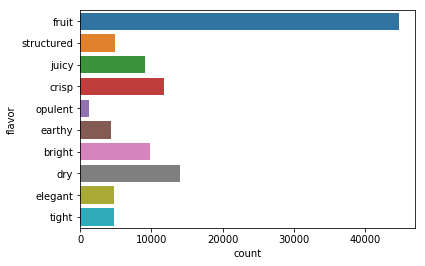

In [8]:
flavors = pd.DataFrame(['acidic', 'angular', 'austere', 'barnyard', 'big', 'bright', 'buttery', 'cassis', 'charcoal', 'chewy', 'smoky', 'creamy', 'crisp', 'dense', 'dry', 'earthy', 'elegant', 'fat', 'flabby', 'flamboyant', 'fleshy', 'fruit', 'grippy', 'jammy', 'juicy', 'lees', 'minerally', 'oak', 'opulent', 'refined', 'silky', 'steely', 'structured', 'sweet', 'tight', 'toasty', 'unctuous', 'velvet'], columns = {'flavor'})
flavor_bag = bag.merge(flavors)

sns.barplot(x = 'count', y = 'flavor', data = flavor_bag.head(10))

In [74]:
def recommend(keywords):
    wine_rec = wine.copy()
    wine_rec['recommendation'] = wine_rec['description'].str.contains(keywords[0])*5 + wine_rec['description'].str.contains(keywords[1])*4 + wine_rec['description'].str.contains(keywords[2])*3 + wine_rec['description'].str.contains(keywords[3])*2 + wine_rec['description'].str.contains(keywords[4])*1
    output = wine_rec[['title', 'recommendation', 'points', 'price', 'country', 'province', 'description']].sort_values(by=['recommendation'], ascending = False).head(10)
    dne = []
    combined_str = ''
    
    for rec in wine_rec['description']:
        combined_str += rec

    if keywords[0] not in combined_str:
      dne.append(keywords[0])
    if keywords[1] not in combined_str:
      dne.append(keywords[1])
    if keywords[2] not in combined_str:
      dne.append(keywords[2])
    if keywords[3] not in combined_str:
      dne.append(keywords[3])
    if keywords[4] not in combined_str:
      dne.append(keywords[4])
    
    print ('Keywords {} do not exist'.format(dne))
    return output

In [79]:
recommend(['cantalope', 'cherry', 'black', 'red', 'godzilla'])

Keywords ['cantalope', 'godzilla'] do not exist


,title,recommendation,points,price,country,province,description
13310,Avignonesi 2011 Grandi Annate (Vino Nobile di...,9,90,60.0,Italy,Tuscany,"Forest floor, ripe berry and cake spice aromas..."
58840,Binyamina 2012 Reserve Cabernet Sauvignon (Upp...,9,91,25.0,Israel,Upper Galilee,"Dark red violet in color, this wine has aromas..."
58833,Silvano Bolmida 2009 Bussia Riserva (Barolo),9,91,NaN,Italy,Piedmont,"This offers aromas of red rose, wild berry, da..."
78282,Gigi Rosso 2011 Arione (Barolo),9,93,NaN,Italy,Piedmont,"Underbrush, cooking spices, dark berry and sco..."
78281,Fratelli Alessandria 2011 Gramolere (Barolo),9,93,64.0,Italy,Piedmont,"Alluring scents of perfumed berry, underbrush,..."
58814,Doga delle Clavule 2011 Morellino di Scansano,9,86,15.0,Italy,Tuscany,This blend of 85% Sangiovese and 15% Alicante ...
58811,Murphy-Goode 2011 All In Claret Red (Alexander...,9,86,24.0,US,California,"Here's a basic red wine, full-bodied and dry, ..."
91641,Arnaldo Caprai 2013 25 Anni (Montefalco Sagra...,9,92,100.0,Italy,Central Italy,"Plum, dark berry and baking-spice aromas slowl..."
31422,Clos de la Tech 2012 Domaine Lois Louise Cote ...,9,95,82.0,US,California,"Quite dark in the glass, this bottling from te..."
121911,Franz Haas 2009 Lagrein (Alto Adige),9,88,36.0,Italy,Northeastern Italy,"Ripe fruit, blackberry, cherry liqueur and cin..."


In [10]:
dne = []

if keywords[0] in wine_rec['description']:
  dne.append(keywords[0])
if keywords[1] in wine_rec['description']:
  dne.append(keywords[1])
if keywords[2] in wine_rec['description']:
  dne.append(keywords[2])
if keywords[3] in wine_rec['description']:
  dne.append(keywords[3])

NameError: name 'wine_rec' is not defined

In [70]:
wine_rec = wine.copy()
combined_str = ''

for rec in wine_rec['description']:
    combined_str += rec
'Aromas' in combined_str

True

In [65]:
dne

[]